# Initial Analysis
----
This is some messy initial analysis of data provided by Mark before trip data was available

In [1]:
# load packages
library(tidycensus)
library(ggplot2)
library(tidyverse)
library(lmerTest)


── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ tibble  2.1.3     ✔ purrr   0.3.2
✔ tidyr   0.8.3     ✔ dplyr   0.8.3
✔ readr   1.3.1     ✔ stringr 1.4.0
✔ tibble  2.1.3     ✔ forcats 0.4.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Loading required package: lme4
Loading required package: Matrix

Attaching package: ‘Matrix’

The following object is masked from ‘package:tidyr’:

    expand


Attaching package: ‘lmerTest’

The following object is masked from ‘package:lme4’:

    lmer

The following object is masked from ‘package:stats’:

    step



In [2]:
# read in data
five_min_entry <- read.csv("../../../data/fiveMinuteEntryPriceandVolumeNB&SBcombined.csv")
nb_mod <- read.csv("../../../data/allNBmod.csv")
sb_mod <- read.csv("../../../data/allSBmod.csv")

## Price and Count Analysis

In [3]:
# rename variables
five_min_entry <- five_min_entry %>%
  rename(price = ceil,
         date_time = fiveint)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Saving 7 x 7 in image
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


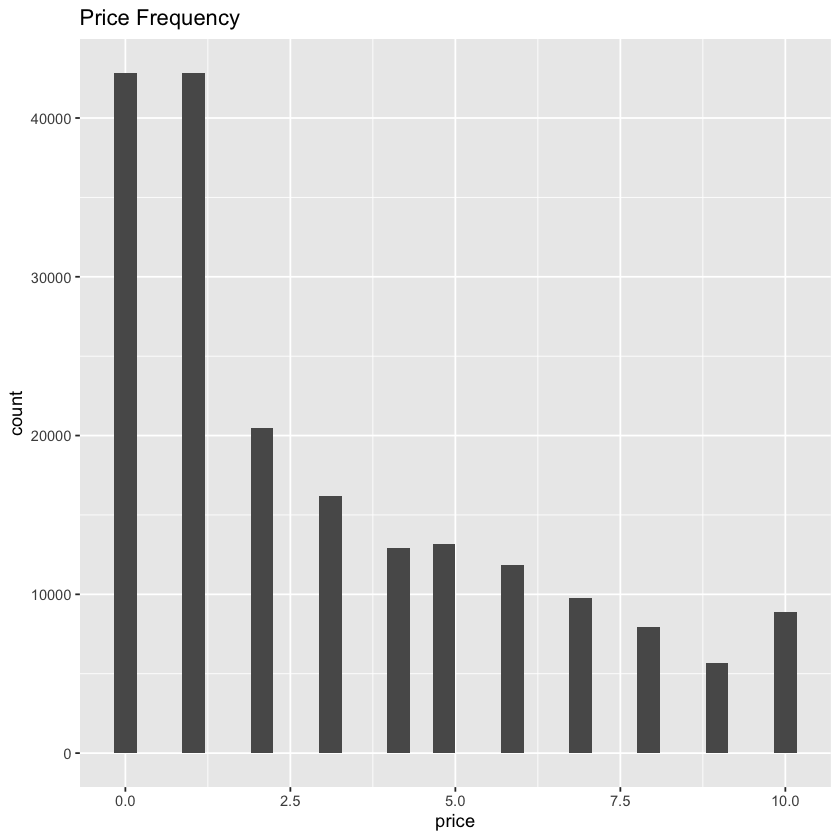

In [4]:
# plots how many five-minute time periods each price was present
price_frequency <- ggplot(five_min_entry, aes(x = price)) +
  geom_histogram() +
  ggtitle(label = "Price Frequency")

price_frequency
ggsave("/Users/cj/DSSG/price_frequency.png", price_frequency)

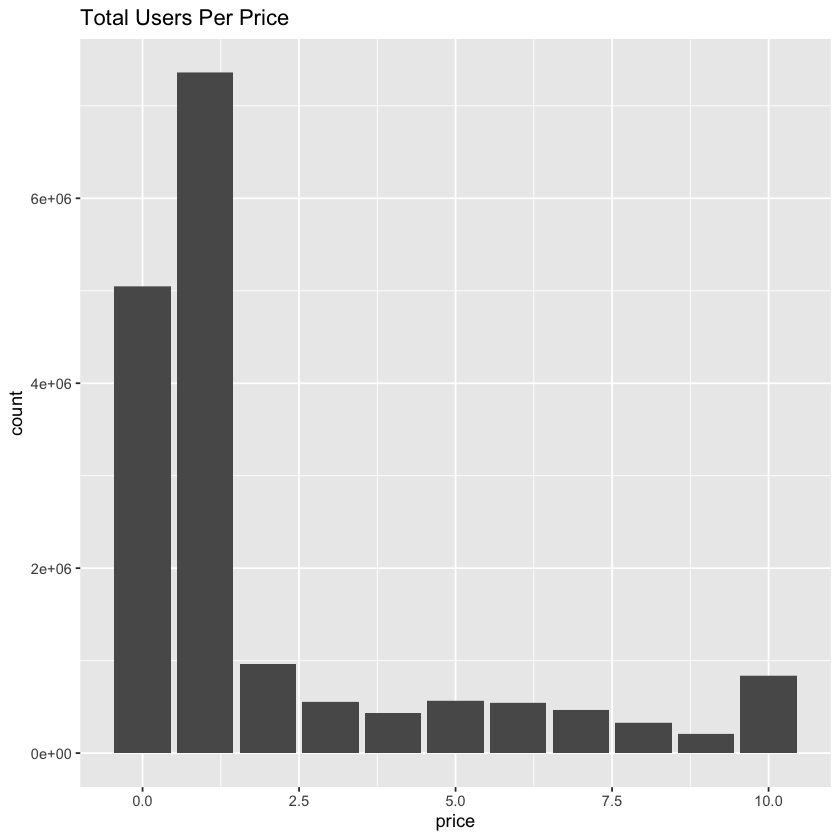

In [5]:
# plots the count of each HOT lane user per price
ggplot(five_min_entry, aes(x = price, y = count)) +
  geom_bar(stat = "identity") + 
  ggtitle(label = "Total Users Per Price")

In [6]:
# creates weekday variable
five_min_entry$date_time <- as.Date(five_min_entry$date_time)
five_min_entry$weekday <- weekdays(five_min_entry$date)

In [7]:
# summarizes weekdays
average_price_weekday <- five_min_entry %>%
  group_by(weekday) %>%
  summarize(average_price_weekday = mean(price, na.rm = T))

average_price_weekday$weekday <- factor(average_price_weekday$weekday,
                                          levels = c("Monday","Tuesday", "Wednesday",
                                                     "Thursday", "Friday", "Saturday","Sunday"))

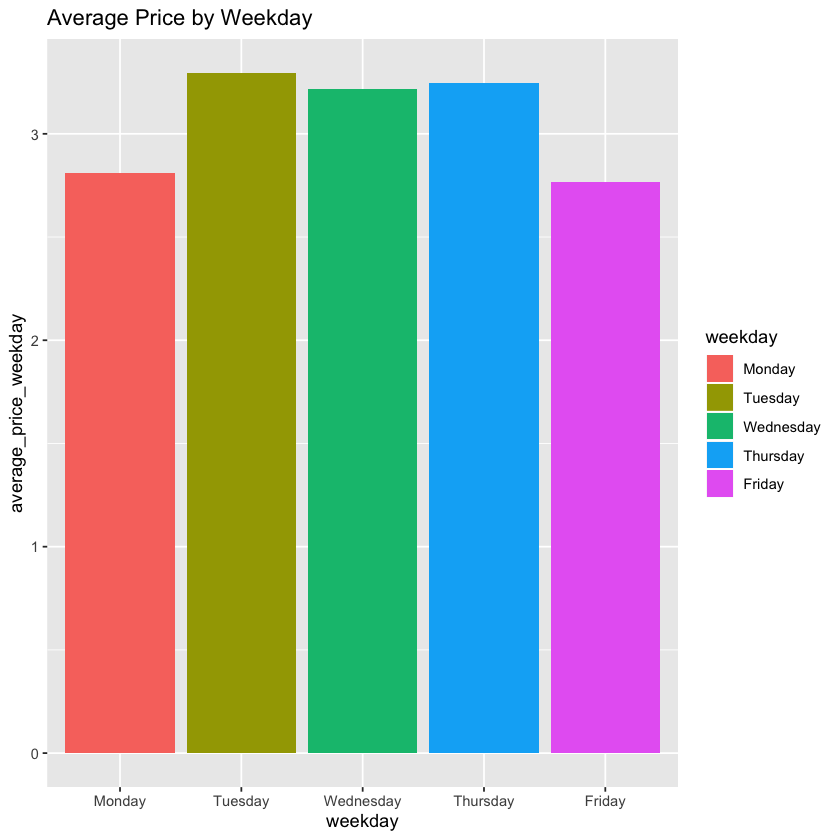

In [8]:
# plots average price by weekday
ggplot(average_price_weekday, aes(x = weekday, y = average_price_weekday, fill = weekday)) + 
  geom_bar(stat = "identity") + 
  ggtitle(label = "Average Price by Weekday")

## Trip Analysis

In [9]:
# selects for corridor trips, northbound and renames/factors
nb_corridor_trip <- nb_mod %>%
  select(date.time, time, weekday, nb_01_10_GP, nb_01_10_HOV) %>%
  mutate(nb_01_10_SV = nb_01_10_GP - nb_01_10_HOV)

nb_corridor_trip$date.time <- as.Date(nb_corridor_trip$date.time)

nb_corridor_trip$weekday <- weekdays(nb_corridor_trip$date.time)
                                     
nb_corridor_trip$weekday <- factor(nb_corridor_trip$weekday,
                                        levels = c("Monday","Tuesday", "Wednesday",
                                                   "Thursday", "Friday", "Saturday","Sunday"))

ERROR: Error in .f(.x[[i]], ...): object 'date.time' not found


In [ ]:
#graphs total trip timeh
ggplot(nb_corridor_trip, aes(x = time)) + 
    geom_point(aes(y = nb_01_10_GP, color = "red")) +
    geom_point(aes(y = nb_01_10_HOV, color = "blue"))

In [ ]:
# groups by date and summarizes savings
average_date <- nb_corridor_trip %>%
  mutate(date = as.Date(date.time)) %>%
  group_by(date) %>%
  summarize(average_savings_date = mean(nb_01_10_SV, na.rm = T),
            average_gp_date = mean(nb_01_10_GP, na.rm = T),
            average_hov_date = mean(nb_01_10_HOV, na.rm = T))

In [ ]:
# plots averages gp and hov times by date
traveltime_date <- ggplot(average_date) + 
  geom_line(aes(x = date, y = average_gp_date), color = "red") +
  geom_line(aes(x= date, y = average_hov_date), color = "blue") +
  ggtitle(label = "Average Travel Time by Date for NB Corridor Trips (red is gp, blue is HOV)")

traveltime_date
ggsave("../traveltime_date.png", traveltime_date)

In [ ]:
# plots average savings by date
ggplot(average_date, aes(x = date, y = average_savings_date)) + 
  geom_point(size = .75) + 
  ggtitle(label = "Average Savings by Date (in seconds) for NB Corridor Trips")

In [ ]:
# summarizes weekdays
average_weekday <- nb_corridor_trip %>%
  group_by(weekday) %>%
  summarize(average_savings_weekday = mean(nb_01_10_SV, na.rm = T),
            average_gp_weekday = mean(nb_01_10_GP, na.rm = T),
            average_hov_weekday = mean(nb_01_10_HOV, na.rm = T))
head(average_weekday)

In [ ]:
# plots average savings by weekday
savings_weekday <- ggplot(average_weekday, aes(x = weekday, y = average_savings_weekday, fill = weekday)) + 
  geom_bar(stat = "identity") + 
  ggtitle(label = "Average Savings by Weekday (in seconds) for NB Corridor Trips")

savings_weekday
ggsave("../savings_weekday.png", savings_weekday)
